In [2]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
housing <- read.table("Housing.txt", header = TRUE)
head(housing)

,price,sqft,condition,neighborhood
,<dbl>,<int>,<int>,<chr>
1,232.42,1018,3,A
2,180.19,915,2,A
3,340.54,1398,3,A
4,517.95,1552,1,A
5,310.20,1733,2,B
6,592.82,2983,3,D


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


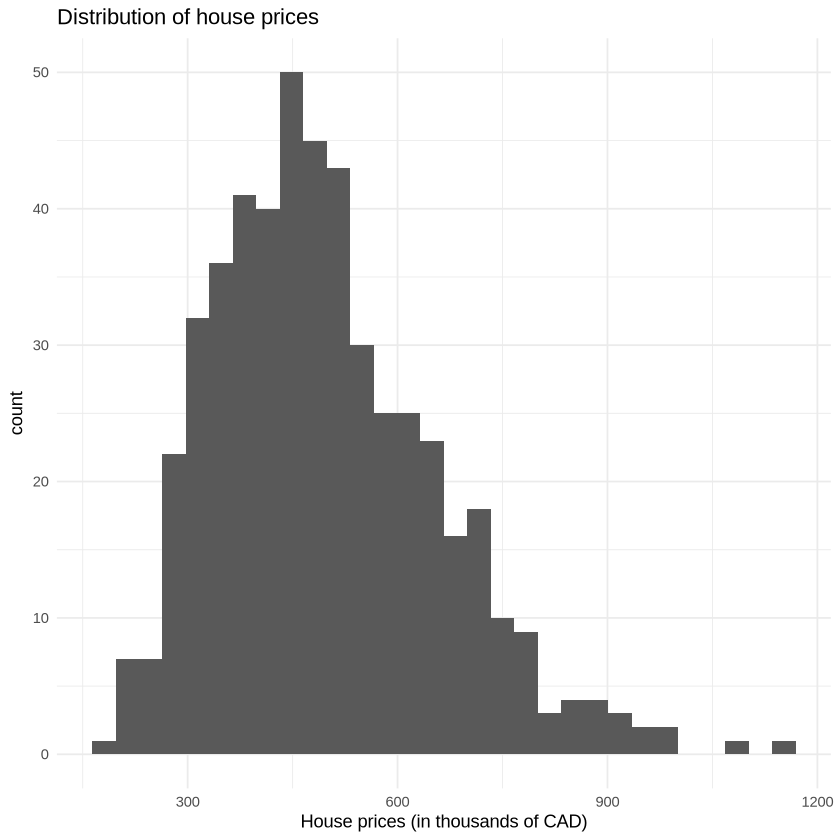

In [4]:
q1a <- ggplot(housing, aes(x = price)) +
       geom_histogram() +
       labs(x = "House prices (in thousands of CAD)", title = "Distribution of house prices") +
       theme_minimal()
q1a

In [5]:
median(housing$price)
IQR(housing$price)

[1] 475.26

[1] 213.15

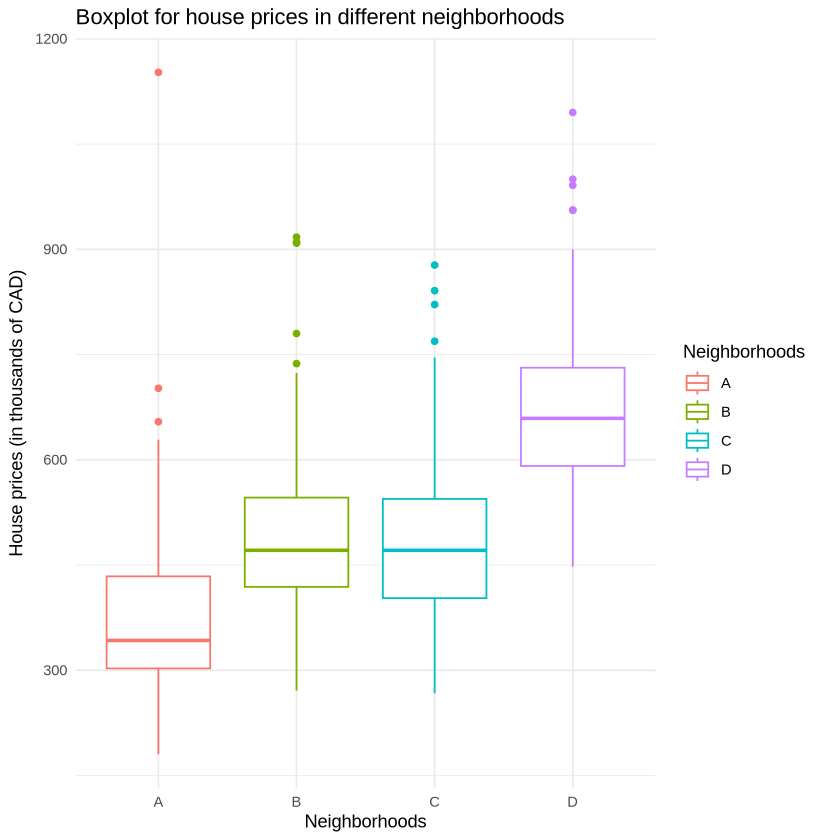

In [6]:
q1c <- ggplot(housing, aes(x = neighborhood, y = price, color = neighborhood)) +
       geom_boxplot() +
       labs(x = "Neighborhoods", y = "House prices (in thousands of CAD)", title = "Boxplot for house prices in different neighborhoods", color = "Neighborhoods") +
       theme_minimal()
q1c

In [7]:
A <- filter(housing, neighborhood == "A") 
IQR(A$price)

[1] 131.1925

In [8]:
B <- filter(housing, neighborhood == "B") 
IQR(B$price)

[1] 127.24

In [9]:
C <- filter(housing, neighborhood == "C") 
IQR(C$price)

[1] 141.405

In [10]:
D <- filter(housing, neighborhood == "D") 
IQR(D$price)

[1] 140.095

NULL

`geom_smooth()` using formula = 'y ~ x'


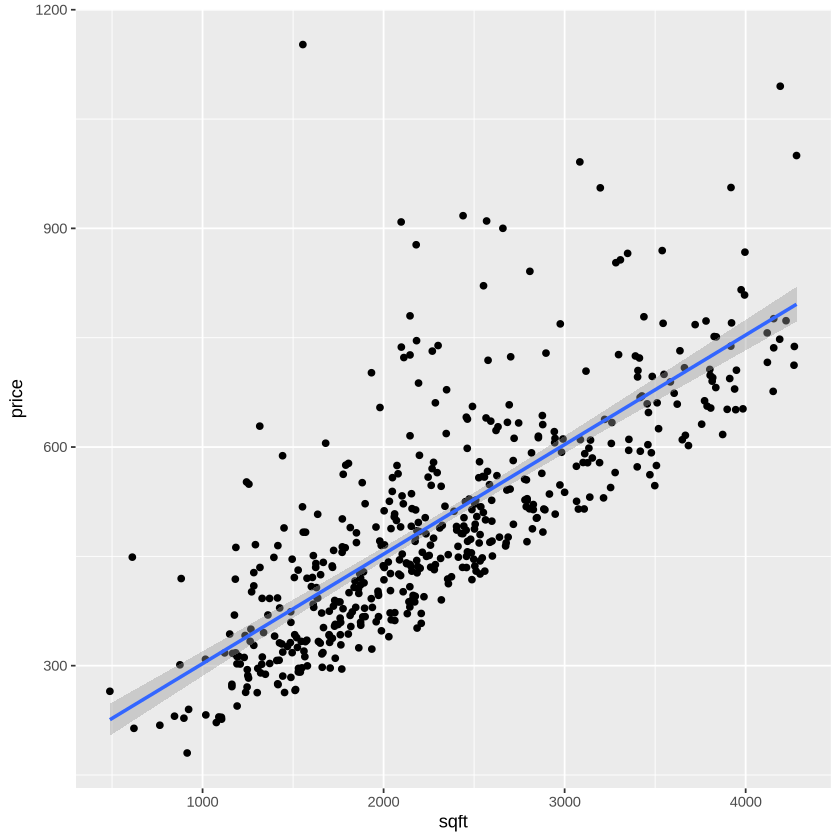

In [11]:
q2a <- ggplot(housing, aes(x = sqft, y = price)) +
       geom_point() +
       geom_smooth(method = "lm")
       labs(x = "Total living area in square feet", y = "House sale price in thousands of CAD (K$)", title = "sqft vs price") +
       theme_minimal()
q2a

In [13]:
cor(housing$sqft, housing$price)

[1] 0.7655465

In [14]:
cor(housing$price, housing$sqft)

[1] 0.7655465

In [15]:
ef <- lm(price~sqft, data = housing)
coef(ef)

(Intercept)        sqft 
152.5282526   0.1502827

In [16]:
predict(ef, newdata = data.frame(sqft = 2500))

1 
528.2349

In [17]:
range(housing$sqft)

[1]  488 4281

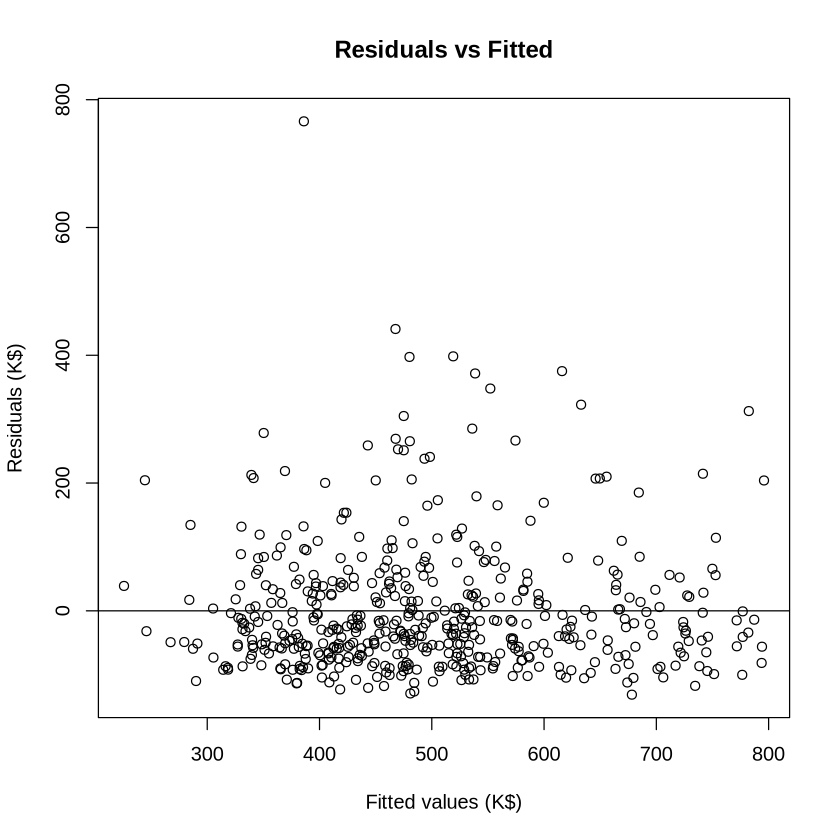

In [20]:
plot(ef$fitted.values, resid(ef),
     main = "Residuals vs Fitted",
     xlab = "Fitted values (K$)",
     ylab = "Residuals (K$)")
abline(h = 0)